
Processing: piece03.png


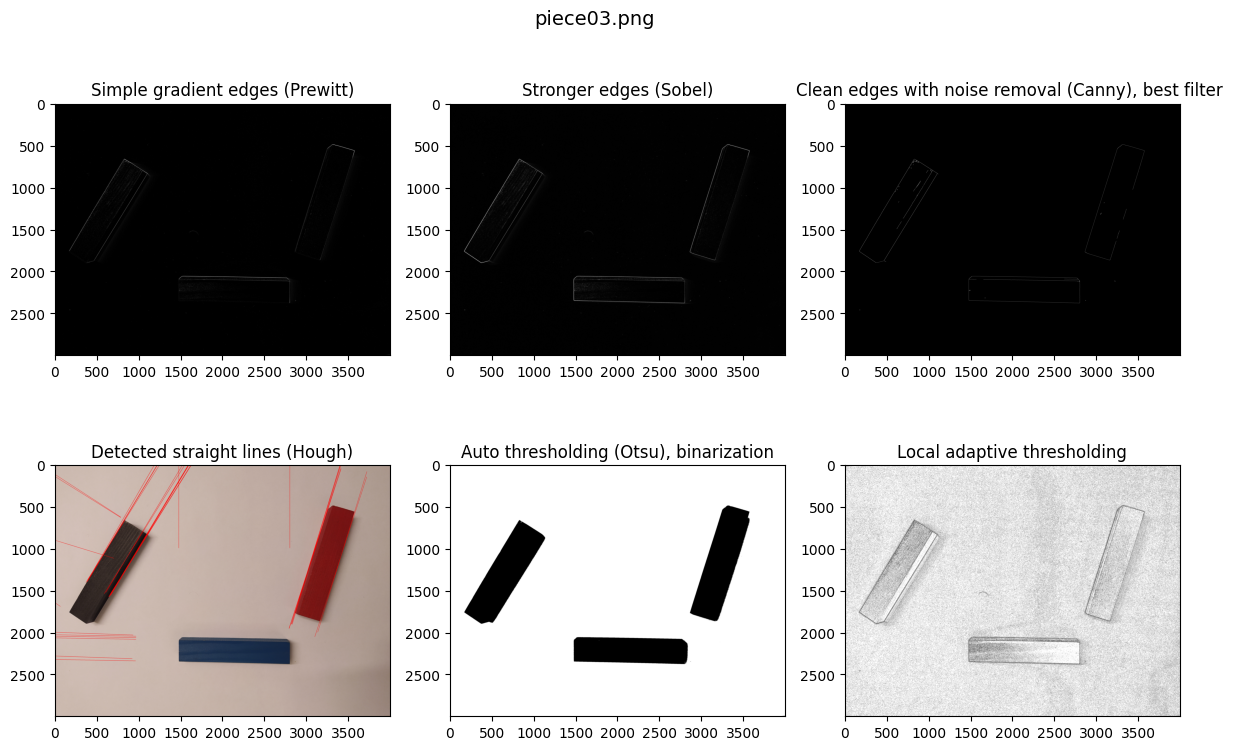


Processing: dog.png


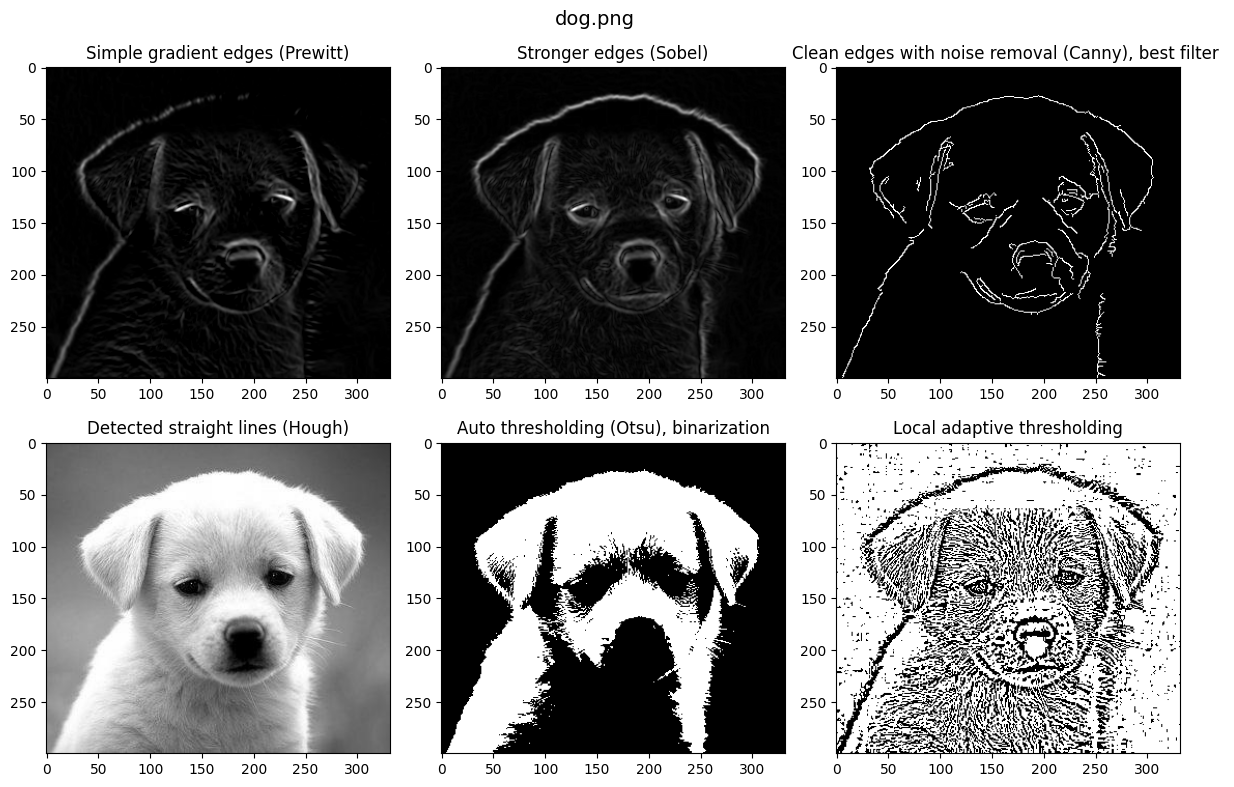


Processing: Coins.png


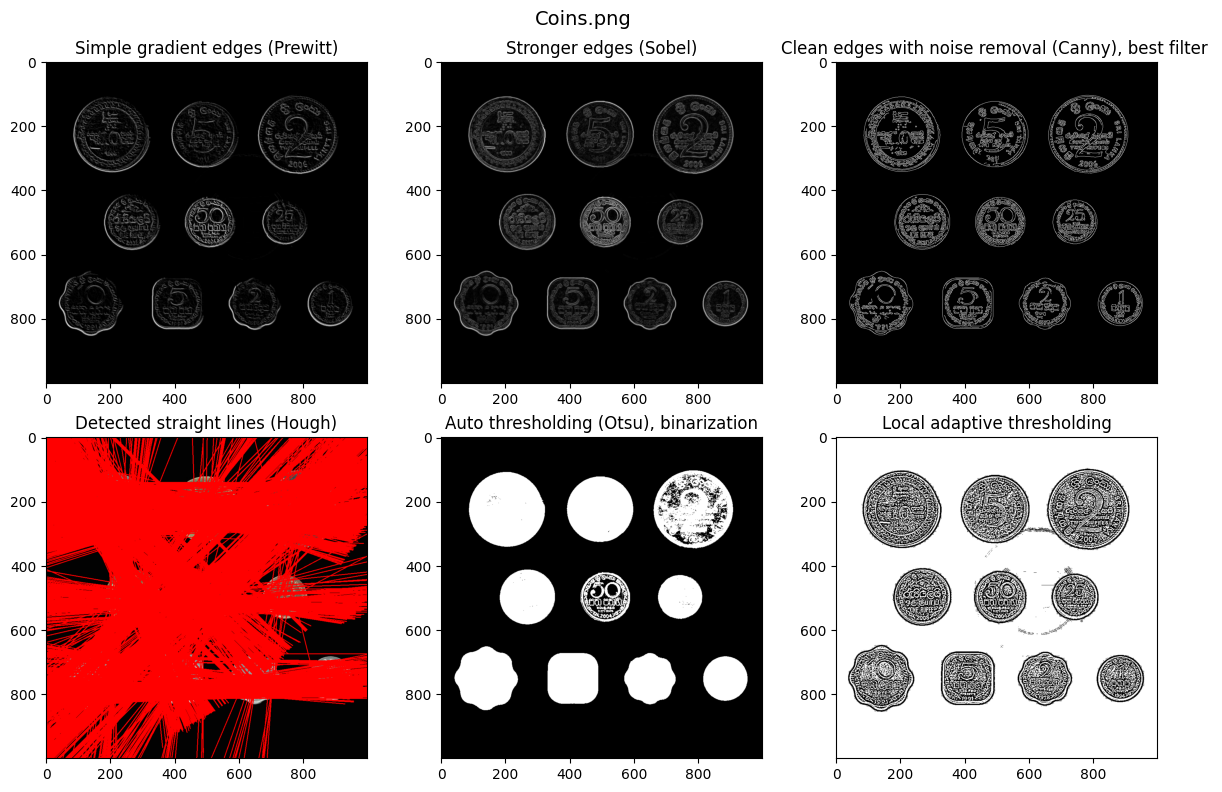


Processing: icons01.png


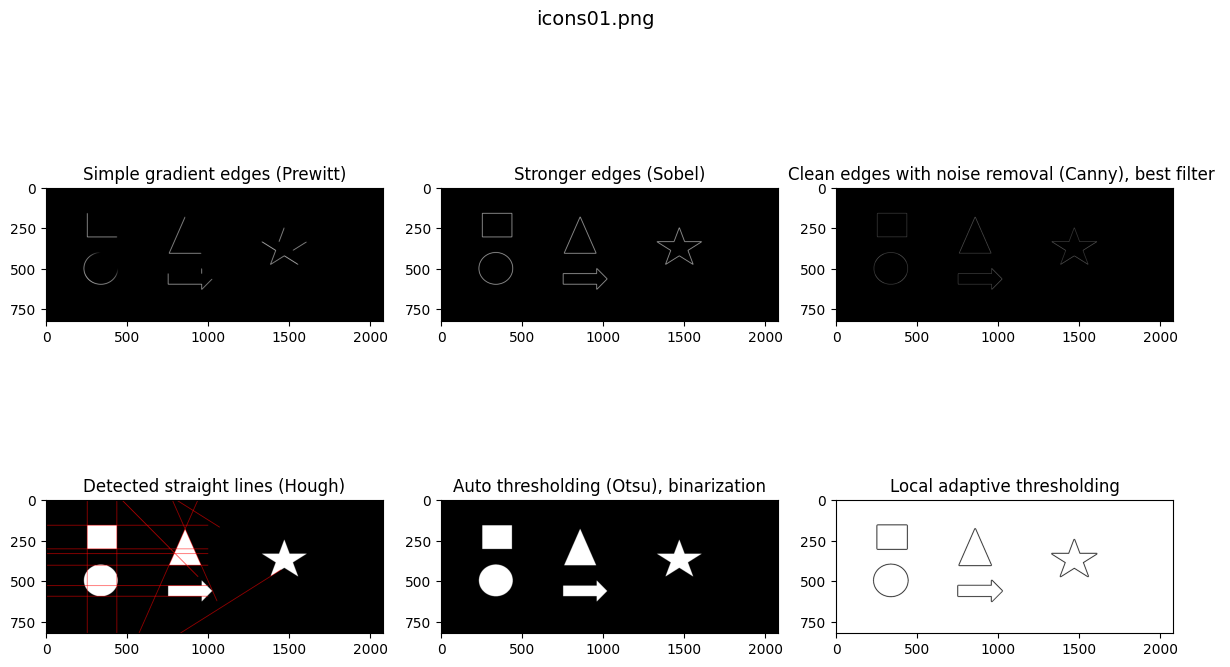


Processing: car.png


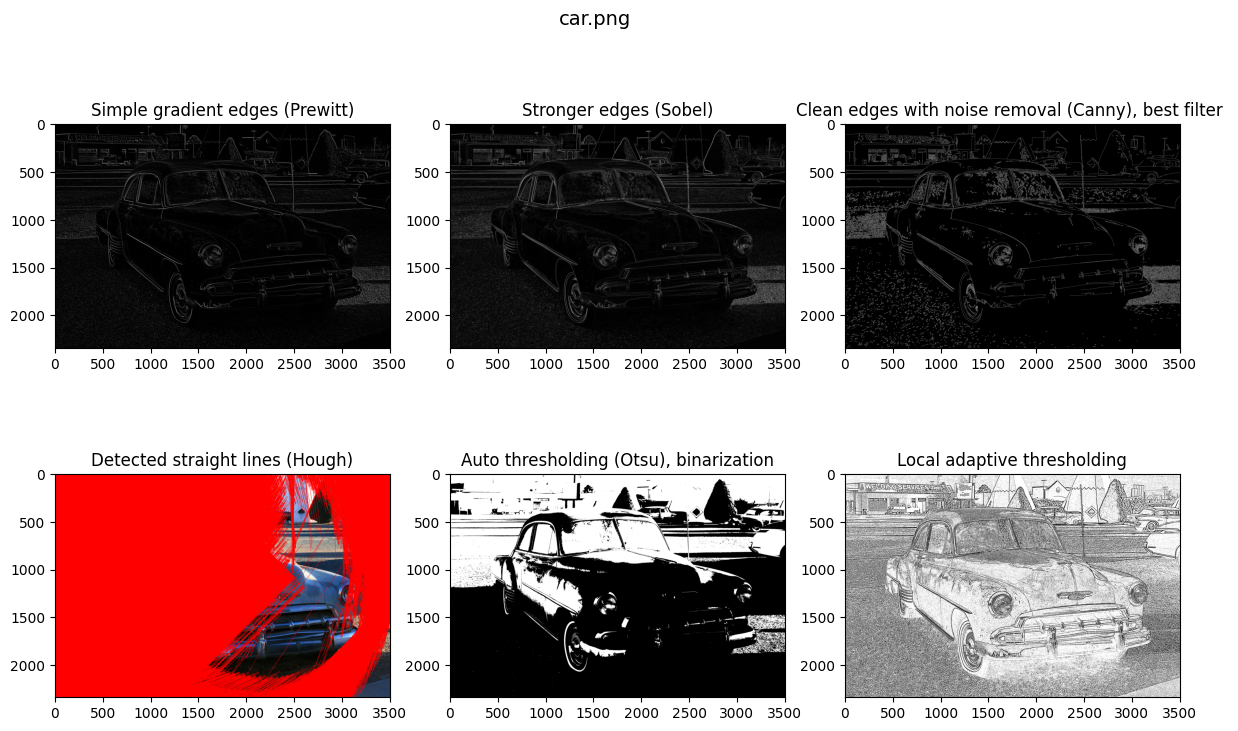

In [ ]:
for path in image_paths:
    print('\nProcessing:', path)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)

    # Prewitt
    Gx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])   # Finding vertical edges by using brighness differences between right and left
    Gy = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])   # Finding horizontal edges by using brightness differenes between top and left
    px = cv2.filter2D(blur,-1,Gx)   # Px -> edges found in x directionn,  Gx detects vertical edges
    py = cv2.filter2D(blur,-1,Gy)   # Py -> edges found in y direction, Gy detects horizontal edges, -1  means the depth of input and output should be the same
    prewitt = cv2.magnitude(px.astype(float), py.astype(float))

    # Sobel
    sx = cv2.Sobel(blur, cv2.CV_64F,1,0,ksize=3)
    sy = cv2.Sobel(blur, cv2.CV_64F,0,1,ksize=3)
    sobel = cv2.magnitude(sx, sy)

    # Canny
    canny = cv2.Canny(blur,50,150)

    # Hough
    edges = cv2.Canny(blur,50,150)  # as hough needs binary image, canny is used, low_threshold = 50, high_threshold = 150, pixels with gradients > 150 => defenitly edges, pixels < 50 => defenitely not edges, between these two values maybe edges maybe not

    # Adjustable Hough Threshold
    hough_threshold = 100 # You can change this value to tune the sensitivity
    lines = cv2.HoughLines(edges,1,np.pi/180,hough_threshold) # np.pi/180 is angle resolution. If fewer than 120 pixels lie along that line → the line is ignored
    draw = img.copy()
    if lines is not None:
        for r,theta in lines[:,0]:
            a,b = np.cos(theta), np.sin(theta)
            x0,y0 = a*r, b*r
            x1,y1 = int(x0+1000*(-b)), int(y0+1000*(a))
            x2,y2 = int(x0-1000*(-b)), int(y0-1000*(a))
            cv2.line(draw,(x1,y1),(x2,y2),(0,0,255),2)

    # Otsu
    ret, otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Adaptive
    adapt = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY,11,2)

    # Display
    plt.figure(figsize=(12,8))
    plt.suptitle(path, fontsize=14)
    plt.subplot(231); plt.imshow(prewitt,cmap='gray'); plt.title('Simple gradient edges (Prewitt)')
    plt.subplot(232); plt.imshow(sobel,cmap='gray'); plt.title('Stronger edges (Sobel)')
    plt.subplot(233); plt.imshow(canny,cmap='gray'); plt.title('Clean edges with noise removal (Canny), best filter ')
    plt.subplot(234); plt.imshow(cv2.cvtColor(draw,cv2.COLOR_BGR2RGB)); plt.title('Detected straight lines (Hough)')
    plt.subplot(235); plt.imshow(otsu,cmap='gray'); plt.title('Auto thresholding (Otsu), binarization')
    plt.subplot(236); plt.imshow(adapt,cmap='gray'); plt.title('Local adaptive thresholding')


    plt.tight_layout()
    plt.show()